In [1]:
# import libraries
import numpy as np
import sys
import psi4
from helper_PFCI import PFHamiltonianGenerator
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)
import time
import json
import matplotlib.pyplot as plt
import json
import os

In [2]:
# read data from .npy files for formaldehyde casci(8,8) calculations
#Drive link for .npy files of LiH

# https://drive.google.com/drive/folders/1NQvqQ4KiXTmZZ3OjCM5nA2dqIs5ete9X?usp=sharing

# !!! Change this to the correct path on your computer!
npy_folder = "/Users/rmandern/code/SCQED-PCQED/LiH/"

# these file names should still be good
E_npy_file = npy_folder + "LiH_r_scan_6311g_fci_tight_davidson_Energies.npy"
Mu_npy_file = npy_folder + "LiH_r_scan_6311g_fci_tight_davidson_Dipoles.npy"

# store energy eigenvalues in E_array
E_array = np.load(E_npy_file)
# store dipole matrix elements in Mu_array
Mu_array = np.load(Mu_npy_file)

# print their shape so we know how many elements we have
print(np.shape(E_array))
print(np.shape(Mu_array))
# print(E_array)

(500, 25)
(500, 500, 3, 25)


In [3]:
# setup basic arguments to create an instance of the PFHamiltonianGenerator class
mol_str = """
    Li
    H 1 1.4
    symmetry c1
"""


options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}


cavity_free_dict = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.0]),
    'ci_level' : 'fci',   
    'full_diagonalization' : True,
    'number_of_photons' : 10, 
}

# create the instance of our PFHamiltonianGenerator class
instance = PFHamiltonianGenerator(mol_str, options_dict, cavity_free_dict)


Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346236295895
CQED-RHF One-electron energy      = -12.6946346236295895
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8605386610570402   dE = -7.86054E+00   dRMS = 1.78708E-13
SCF Iteration   2: Energy = -7.8605386610570491   dE = -8.88178E-15   dRMS = 3.96912E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86053866 hartree
Psi4  SCF energy: -7.86053866 hartree
 Completed QED-RHF in 0.1758279800415039 seconds
 Completed 1HSO Build in 4.38690185546875e-05 seconds
 Completed ERI Build in 0.0010349750518798828 seconds 
 Completed 2D build in 0.00011420249938964844 seconds
 Completed 1G build in 1.2874603271484375e-05 seconds
 Completed the Dipole Matrix Build in 3.3855438232421875e-05 seconds
 Completed determinant list in 0.0004401206970214844 seconds 
 Completed constant offset matrix in 0.000198125839233

In [4]:
N_R = 25

d_array = np.linspace(1.4, 2.2, N_R)
N_l = len(d_array)
N_el = 500
N_ph = 10
omega = 0.12086
lambda_vector = np.array([0, 0, 0.05])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_50010_dse = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector , E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE=True)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_50010_dse[ctr, :] = instance.PCQED_pf_eigs
    ctr += 1

In [7]:
N_R = 25
d_array = np.linspace(1.4, 2.2, N_R)
N_l = len(d_array)
N_el = 500
N_ph = 2
omega = 0.12086
lambda_vector = np.array([0, 0, 0.05])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_1002_dse = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_pf_hamiltonian(N_el, N_ph, omega, lambda_vector ,E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE=True)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_1002_dse[ctr, :] = instance.PCQED_pf_eigs
    ctr += 1

In [8]:
# print(np.shape(_pcqed_5002_dse))

In [9]:
N_R = 25
d_array = np.linspace(1.4, 2.2, N_R)
N_l = len(d_array)
N_el = 500
N_ph = 2
omega = 0.12086
lambda_vector = np.array([0, 0, 0.05])

# create an array of zeros to store the PCQED eigenvalues for each value of d
_pcqed_10021_dse_cs = np.zeros((N_l, N_el * N_ph))
# loop over values of d, build Hamiltonian, capture eigenvalues
ctr = 0
for d in d_array:
    instance.fast_build_pcqed_cs_hamiltonian(N_el, N_ph, omega, lambda_vector ,E_array[:,ctr], Mu_array[:,:,:,ctr], neglect_DSE=False)      # E_array[:,ctr]: 20 energy values for fisrt displacement and so on... 
    _pcqed_10021_dse_cs[ctr, :] = instance.PCQED_cs_eigs
    ctr += 1

In [13]:
# json file name
cs_dir = "/Users/rmandern/code/data_repository/mapol/LiH/qed_fci/bond_stretch_25_points/"
new_cs = "/Users/rmandern/code/data_repository/mapol/LiH/qed_fci/bond_stretch_25_points/"

pn_dir = "/Users/rmandern/code/data_repository/mapol/LiH/qed_fci/bond_stretch_25_points/"

ref_file = "/Users/rmandern/code/data_repository/mapol/LiH/qed_fci/bond_stretch_25_points/"
np10_001_dse = new_cs + "LiH_qed-fci_6-311g_photon_number_basis_w_dse_10_lambda_0.0_0.0_0.01_omega_0.12086.json"
np10_005_dse = new_cs + "LiH_qed-fci_6-311g_photon_number_basis_w_dse_10_lambda_0.0_0.0_0.05_omega_0.12086.json"

np10_001_no_dse = new_cs + "LiH_qed-fci_6-311g_photon_number_basis_no_dse_10_lambda_0.0_0.0_0.01_omega_0.12086.json"
np10_005_no_dse = new_cs + "LiH_qed-fci_6-311g_photon_number_basis_no_dse_10_lambda_0.0_0.0_0.05_omega_0.12086.json"

new_np10_001_dse = json.load(open(np10_001_dse))
new_np10_005_dse = json.load(open(np10_005_dse))
new_np10_001_no_dse = json.load(open(np10_001_no_dse))
new_np10_005_no_dse = json.load(open(np10_005_no_dse))

# reff1 = open(ref_file)
# rdata = json.load(reff1)
# ref_data = np.array(rdata["return_result"])
r_data = np.linspace(1.4, 2.2, 25)

eig_np10_001_dse = np.array(new_np10_001_dse["return_result"])
eig_np10_005_dse = np.array(new_np10_005_dse["return_result"])
eig_np10_001_no_dse = np.array(new_np10_001_no_dse["return_result"])
eig_np10_005_no_dse = np.array(new_np10_005_no_dse["return_result"])

#npth = "C10H8_number_basis_np_0.json"
#npth_data = json.load(open(npth))

#coords = npth_data["molecule"]["coordinates"]
#print(coords)
print(np.shape(eig_np10_001_dse))

(25, 10)


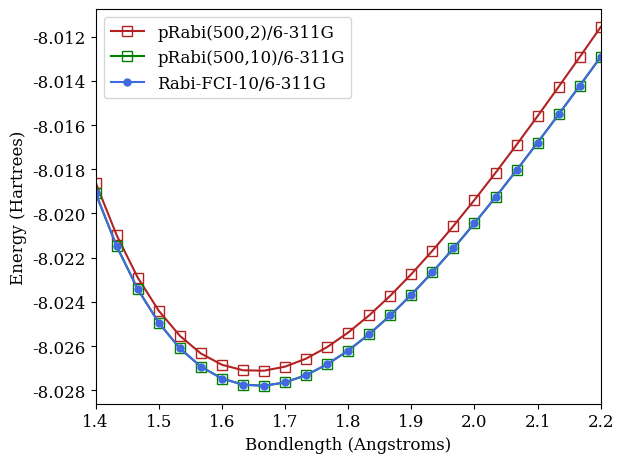

In [22]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import json
from matplotlib import cm
from matplotlib import rcParams


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
# define color palette
COLOUR1 = "firebrick"
COLOUR2 = "green"
COLOUR3 = "royalblue"
COLOUR4 = "rebeccapurple"
COLOUR5 = 'darkorchid'
COLOUR6 = 'olivedrab'

# Update to current figure 7 that excludes the coherent state data


# plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pPF(500,2)/6-311G')
# plt.plot(d_array, _pcqed_50010_dse[:,0],color=COLOUR2, marker="s", ms="7", mfc="none", label='pPF(500,10)/6-311G')
# plt.plot(d_array,_pcqed_10021_dse_cs[:,0], color=COLOUR5, marker="^", ms="7", label='pCS(500,2)/6-311G')

plt.plot(d_array,_pcqed_1002_dse[:,0], color=COLOUR1, marker="s", ms="7", mfc="none", label='pRabi(500,2)/6-311G')
plt.plot(d_array, _pcqed_50010_dse[:,0],color=COLOUR2, marker="s", ms="7", mfc="none", label='pRabi(500,10)/6-311G')

# plt.plot(r_data, eig_np10_001_dse[:,0], "blue", marker="s", ms="5", mfc="none", label='QED-FCI(10,0.01,DSE)')
# plt.plot(r_data, eig_np10_001_no_dse[:,0], 'red', marker="s", ms="5", mfc="none", label='QED-FCI(10,0.01,No_DSE')
# plt.plot(r_data, eig_np10_005_dse[:,0],  color=COLOUR3, marker="o", ms="7", label='PF-FCI-10/6-311G')
plt.plot(r_data, eig_np10_005_no_dse[:,0],color=COLOUR3, marker="o", ms="5", label='Rabi-FCI-10/6-311G')

# plt.plot(r_data, perturbative_energy_vals_cs,'orange', marker="*", ms="10", mfc="none",label='DSE perturbative Cs')
# plt.plot(r_data, perturbative_energy_vals_no_dse,'black', marker="*", ms="5", mfc="none",label=' DSE perturbative')

# plt.plot(d_array, _pcqed_1002_dse[:,2],color='k',linestyle='--',linewidth=1.5, label="PCQED Dse(500,10)")
# plt.plot(d_array,_pcqed_10023_dse[:,2], color='y',linestyle='--',linewidth=1.5, label='PCQED Dse(500,2)')
# plt.plot(d_array, _pcqed_5002_dse_cs[:,0], color='m', linestyle='--',linewidth=1.5,label="PCQED Dse Cs(500,2)")



plt.legend()
plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Energy (Hartrees)")
plt.xlim(1.4, 2.2)
# plt.ylim(-7.9970, -7.9966)
# rcParams['font.family'] = 'serif'
# rcParams['font.size'] = 12
plt.gca().yaxis.set_major_formatter('{:.3f}'.format)

plt.tight_layout()
plt.savefig("LiH_Rabi_scan_modified.png", dpi=150)
plt.show()



# diff_cs_1 = eig6[:,0]-ref_data[:,0]
# max_cs_1 = max(diff_cs_1)
# min_cs_1 = min(diff_cs_1)
# print(F'CS-1: Max diff {max_cs_1}, Min diff {min_cs_1}, NPE {max_cs_1 - min_cs_1}')


# diff_cs_10 = eig610[:,0]-ref_data[:,0]
# max_cs_10 = max(diff_cs_10)
# min_cs_10 = min(diff_cs_10)
# print(F'CS-10: Max diff {max_cs_10}, Min diff {min_cs_10}, NPE {max_cs_10 - min_cs_10}')

# diff_pn_1 = peig6[:,0]-ref_data[:,0]
# max_pn_1 = max(diff_pn_1)
# min_pn_1 = min(diff_pn_1)
# print(F'PN-1: Max diff {max_pn_1}, Min diff {min_pn_1}, NPE {max_pn_1 - min_pn_1}')

# diff_pn_10 = peig610[:,0]-ref_data[:,0]
# max_pn_10 = max(diff_pn_10)
# min_pn_10 = min(diff_pn_10)
# print(F'PN-10: Max diff {max_pn_10}, Min diff {min_pn_10}, NPE {max_pn_10 - min_pn_10}')


# print(np_mae[3], np_mae10[3], cs_mae[3], cs_mae10[3])

In [ ]:
plt.plot(r_data, _pcqed_10010_withoutdse[:,0]-eig_np10_005_no_dse[:,0],"bo-", label='No DSE Difference, PCQED vs QED-FCI')
plt.plot(r_data, _pcqed_10010_dse[:,0]-eig_np10_005_dse[:,0],"black", marker="s", ms="5", mfc="none", label='DSE Difference, PCQED vs QED-FCI')


plt.plot(r_data, eig_np10_005_no_dse[:,0]-perturbative_energy_vals[:,0],"red", marker="s", ms="5", mfc="none", label='No DSE Difference, PCQED vs QED-FCI')
# plt.plot(r_data, eig_np10_005_dse[:,0]-perturbative_energy_vals_no_dse[:,0],"blue", marker="s", ms="5", mfc="none", label='DSE_Difference(0.05)')
# plt.plot(r_data, _pcqed_10010_withoutdse[:,0]-eig_np10_005_no_dse[:,0], "red", marker="s", ms="5", mfc="none",label='No_DSE_Difference(0.05)')


plt.xlabel("Bondlength (Angstroms)")
plt.ylabel("Error (Hartrees)")
# plt.xlim(1.4, 2.0)
# plt.ylim(-7.982, -7.965)
plt.legend()
plt.tight_layout()
plt.savefig("LiH_QEDFCI_vs_PCQED_400_vs_5000.png", dpi=150)
plt.show()
